<a href="https://colab.research.google.com/github/Neerajmn28/Data-Science-Projects/blob/main/Spotify%20API%20Music%20Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 12.2 MB/s eta 0:00:00


#Project Description:
The Spotify Music Recommendation System project aims to develop a personalized recommendation system for users based on their listening habits and preferences. This project utilizes the Spotify API to access user data, including listening history, favorite tracks, and playlists, to generate tailored music recommendations.

Features and Components:

User Authentication: Implement user authentication using the Spotify API to access user data securely.

Data Collection: Retrieve user data such as listening history, favorite tracks, playlists, and user profile information from the Spotify API.

Data Preprocessing: Clean and preprocess the retrieved data to extract relevant features for recommendation.

Content-Based Filtering: Utilize content-based filtering techniques to recommend songs based on user preferences, such as genre, artist, tempo, and mood.

Collaborative Filtering: Implement collaborative filtering algorithms to recommend songs based on user similarity and preferences of similar users.

Hybrid Recommendation: Combine content-based and collaborative filtering techniques to provide more accurate and diverse music recommendations.

In [2]:
import requests
import base64
import pandas as pd
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px

In [3]:
CLIENT_ID = 'c0f35e02491640edb0da214fc91d854b'
CLIENT_SECRET = 'b1d1ed5543bd47938380fbf58d3ff882'

# Base64 encode the client ID and clu=ient secret
client_credentials = f'{CLIENT_ID}:{CLIENT_SECRET}'
client_credentials_base64 = base64.b64encode(client_credentials.encode())

# Request the access token
token_url = 'https://accounts.spotify.com/api/token'
headers = {'Authorization': f'Basic {client_credentials_base64.decode()}'}

data = {'grant_type': 'client_credentials'}
response =  requests.post(token_url, data = data, headers = headers)

if response.status_code == 200:
  access_token = response.json()['access_token']
  print('Access token obtained successfully.')
else:
  print('Error obtaining access token.')
  exit()

Access token obtained successfully.


In [4]:
def get_trending_playlist_data(playlist_id, access_token):
    import spotipy
    import pandas as pd

    # Set up Spotipy with the access token
    sp = spotipy.Spotify(auth=access_token)

    # Get the tracks from the playlist
    playlist_tracks = sp.playlist_tracks(playlist_id, fields='items(track(id, name, artists, album(id, name, images)))')

    # Extract relevant information and store in a list of dictionaries
    music_data = []
    for track_info in playlist_tracks['items']:
        track = track_info['track']
        track_name = track['name']
        artists = ', '.join([artist['name'] for artist in track['artists']])
        album_name = track['album']['name']
        album_id = track['album']['id']
        track_id = track['id']

        # Get album images
        album_images = track['album']['images']

        # Get audio features for the track
        audio_features = sp.audio_features(track_id)[0] if track_id != 'Not available' else None

        # Get release date of the album
        try:
            album_info = sp.album(album_id) if album_id != 'Not available' else None
            release_date = album_info['release_date'] if album_info else None
        except:
            release_date = None

        # Get popularity of the track
        try:
            track_info = sp.track(track_id) if track_id != 'Not available' else None
            popularity = track_info['popularity'] if track_info else None
        except:
            popularity = None

        # Add additional track information to the track data
        track_data = {
            'Track Name': track_name,
            'Artists': artists,
            'Album Name': album_name,
            'Album ID': album_id,
            'Track ID': track_id,
            'Popularity': popularity,
            'Release Date': release_date,
            'Album Images': album_images,
            'Duration (ms)': audio_features['duration_ms'] if audio_features else None,
            'Explicit': track_info.get('explicit', None),
            'External URLs': track_info.get('external_urls', {}).get('spotify', None),
            'Danceability': audio_features['danceability'] if audio_features else None,
            'Energy': audio_features['energy'] if audio_features else None,
            'Key': audio_features['key'] if audio_features else None,
            'Loudness': audio_features['loudness'] if audio_features else None,
            'Mode': audio_features['mode'] if audio_features else None,
            'Speechiness': audio_features['speechiness'] if audio_features else None,
            'Acousticness': audio_features['acousticness'] if audio_features else None,
            'Instrumentalness': audio_features['instrumentalness'] if audio_features else None,
            'Liveness': audio_features['liveness'] if audio_features else None,
            'Valence': audio_features['valence'] if audio_features else None,
            'Tempo': audio_features['tempo'] if audio_features else None,
            # Add more attributes as needed
        }

        music_data.append(track_data)

    # Create a pandas DataFrame from the list of dictionaries
    df = pd.DataFrame(music_data)

    return df

In [5]:
playlist_id = 'https://open.spotify.com/playlist/37i9dQZF1EIX0E845alOim?si=dd20e938cac249b8'

# Call the function to get the music data from the playlist and store it in a DataFrame
music_df = get_trending_playlist_data(playlist_id, access_token)

# Display the DataFrame
print(music_df)

                                           Track Name  \
0                              Gulon Mein Rang Bharey   
1                           Jhanjharia - Male Version   
2                            Yun Zindagi Ki Raah Mein   
3                             Hanuman Chalisa (Lo-fi)   
4                                     Ranjish Hi Sahi   
5                      Chaand Taare (From "Yes Boss")   
6                            Is Dil Pe Naaz Tha Mujhe   
7                                       Jai Shree Ram   
8                        Ye Dhuaan Kahan Se Uthta Hai   
9                           To Chalun (From "Border")   
10                        Pyar Bhare Do Sharmile Nain   
11                          Sapne Mein (From "Satya")   
12                 Mujhe Tum Nazar Se Gira To Rahe Ho   
13                       Socha Tha Kya Hogaya (Lo-Fi)   
14      Rafta Rafta Woh Meri Hasti Ka (From "Zeenat")   
15          Chhupana Bhi Nahin Aata (From "Baazigar")   
16                             

In [6]:
music_df.isnull().sum()

Track Name          0
Artists             0
Album Name          0
Album ID            0
Track ID            0
Popularity          0
Release Date        0
Album Images        0
Duration (ms)       0
Explicit            0
External URLs       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64

In [7]:
data = music_df

# Visualization

 Counting the occurrences of each artist

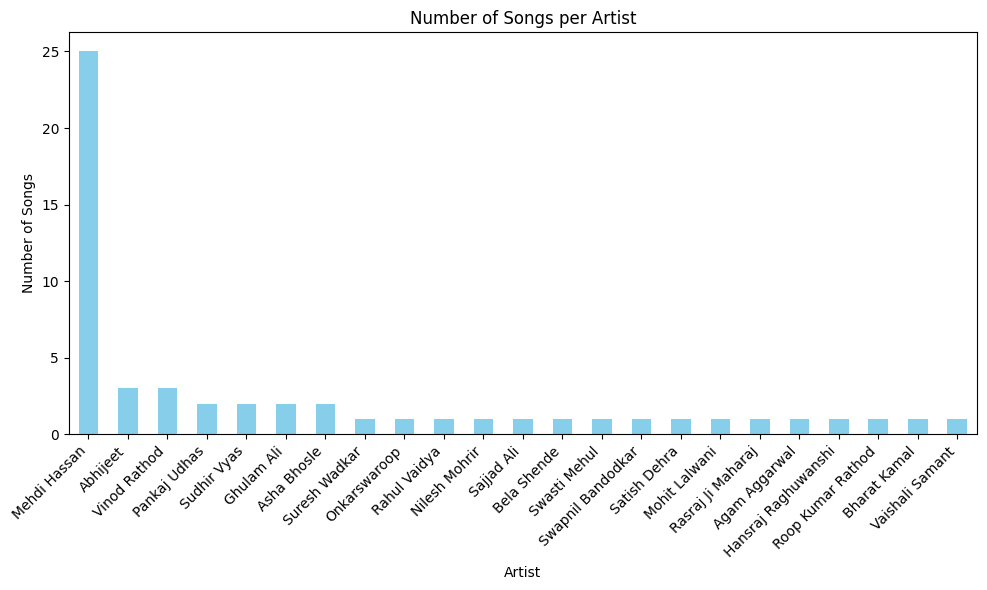

In [8]:
# Counting the occurrences of each artist
artist_counts = data['Artists'].str.split(', ').explode().value_counts()

# Plotting the counts
plt.figure(figsize=(10, 6))
artist_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Songs per Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In this chart, Mehdi Hassan stands out prominently with the highest number of songs compared to other artists. The height of the bar representing Mehdi Hassan is significantly taller than the rest, indicating that he has the most songs among all the artists in the dataset.

Here's a bar chart to understand the popularity of songs.

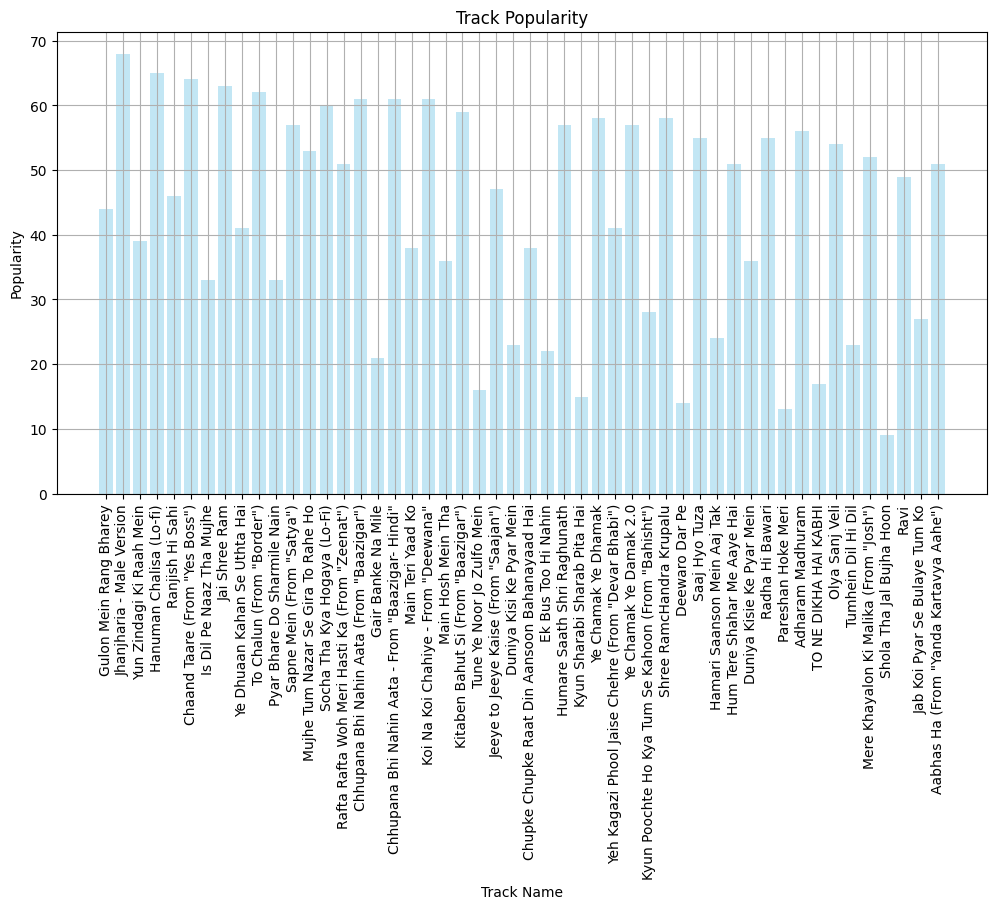

In [9]:
track_names = data['Track Name']
popularity = data['Popularity']

plt.figure(figsize=(12, 6))
plt.bar(track_names, popularity, color='skyblue', alpha=0.5)
plt.title('Track Popularity')
plt.xlabel('Track Name')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [10]:

track_names = data['Track Name']
durations = data['Duration (ms)'] / 1000 # Convert duration from milliseconds to seconds
# Create a bar chart
fig = px.bar(x=track_names, y=durations, labels={'x': 'Track Name', 'y': 'Duration (seconds)'},
             title='Duration of Songs by Track Name')
fig.update_xaxes(tickangle=45, tickfont=dict(size=10))
fig.show()

In [12]:
track_names = data['Track Name']
durations_seconds = data['Duration (ms)'] / 60  # Convert duration from milliseconds to seconds
#durations_minutes = durations_seconds / 60  # Convert duration from seconds to minutes

# Create a bar chart
fig = px.bar(x=track_names, y=durations_seconds, labels={'x': 'Track Name', 'y': 'Duration (minutes)'},
             title='Duration of Songs by Track Name')
fig.update_xaxes(tickangle=45, tickfont=dict(size=10))  # Rotate x-axis labels for better readability
fig.show()

# Weighted Popularity Scores
While providing music recommendations to users, it is important to recommend the latest releases. For this, we need to give more weight to the latest releases in the recommendations

In [13]:
# Define a function for weighted popluarity scores based on release date
def calculate_weighted_popularity(release_date):
  release_date = datetime.strptime(release_date, '%Y-%m-%d')


  # Calculate the time span between release date and today's date
  time_span = datetime.now() - release_date

  # Calculate the weighted popularity score based on time span
  weight = 1/(time_span.days + 1)
  return weight

# Normalization

In [14]:
# Normalise the music features using Min-Max scaling
scaler = MinMaxScaler()
music_features = music_df[['Danceability','Energy','Key','Loudness','Mode','Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo']].values
music_features_scaled = scaler.fit_transform(music_features)

# Content Based Recommendation

In [15]:
# a function to get content-based recommendations based on music features
def content_based_recommendations(input_song_name, num_recommendations=5):
    if input_song_name not in music_df['Track Name'].values:
        print(f"'{input_song_name}' not found in the dataset. Please enter a valid song name.")
        return

    # Get the index of the input song in the music DataFrame
    input_song_index = music_df[music_df['Track Name'] == input_song_name].index[0]

    # Calculate the similarity scores based on music features (cosine similarity)
    similarity_scores = cosine_similarity([music_features_scaled[input_song_index]], music_features_scaled)

    # Get the indices of the most similar songs
    similar_song_indices = similarity_scores.argsort()[0][::-1][1:num_recommendations + 1]

    # Get the names of the most similar songs based on content-based filtering
    content_based_recommendations = music_df.iloc[similar_song_indices][['Track Name', 'Artists', 'Album Name', 'Release Date', 'Popularity']]

    return content_based_recommendations


# Hybrid recommendation

In [16]:
def hybrid_recommendations(input_song_name, num_recommendations=5, alpha=0.5):
    if input_song_name not in music_df['Track Name'].values:
        print(f"'{input_song_name}' not found in the dataset. Please enter a valid song name.")
        return

    # Get content-based recommendations
    content_based_rec = content_based_recommendations(input_song_name, num_recommendations)

    # Get the popularity score of the input song
    popularity_score = music_df.loc[music_df['Track Name'] == input_song_name, 'Popularity'].values[0]

    # Calculate the weighted popularity score
    weighted_popularity_score = popularity_score * calculate_weighted_popularity(music_df.loc[music_df['Track Name'] == input_song_name, 'Release Date'].values[0])

    # Combine content-based and popularity-based recommendations based on weighted popularity
    input_song_info = {
        'Track Name': input_song_name,
        'Artists': music_df.loc[music_df['Track Name'] == input_song_name, 'Artists'].values[0],
        'Album Name': music_df.loc[music_df['Track Name'] == input_song_name, 'Album Name'].values[0],
        'Release Date': music_df.loc[music_df['Track Name'] == input_song_name, 'Release Date'].values[0],
        'Popularity': weighted_popularity_score
    }

    hybrid_recommendations = pd.concat([content_based_rec, pd.DataFrame([input_song_info])], ignore_index=True)

    # Sort the hybrid recommendations based on weighted popularity score
    hybrid_recommendations = hybrid_recommendations.sort_values(by='Popularity', ascending=False)

    # Remove the input song from the recommendations
    hybrid_recommendations = hybrid_recommendations[hybrid_recommendations['Track Name'] != input_song_name]

    return hybrid_recommendations


In [17]:
input_song_name = "Mujhse Mohabbat Ka"
recommendations = hybrid_recommendations(input_song_name, num_recommendations=5)
print(f"Hybrid recommended songs for '{input_song_name}':")
print(recommendations)

'Mujhse Mohabbat Ka' not found in the dataset. Please enter a valid song name.
Hybrid recommended songs for 'Mujhse Mohabbat Ka':
None


# Save the file

In [18]:
import pickle
hybrid_model = hybrid_recommendations
file_path = 'hybrid_model.pkl'
with open(file_path,'wb') as file:
  pickle.dump(hybrid_model, file)